##         **MD. Shohidul Islam**

---


sojibaiub203@gmail.com


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset = '../content/gdrive/MyDrive/cohort6/train.csv'
df = pd.read_csv(dataset)

 # Show the first 10 rows

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# handling missing values

Fill missing ages with median age

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-7-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


Fill missing embarkation points with mode

In [ ]:

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-8-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)



Drop Cabin column because too many values are missing


In [ ]:
df.drop(columns=['Cabin'], inplace=True)

 Remove duplicate values


In [ ]:
df.drop_duplicates(inplace=True)

# Check again missing values

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#Create Age Groups

In [ ]:
#  Child (0-12), 'Adult' (13-59), and 'Senior' (60+)
def age_group(age):
    if age < 13:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

df[['Age', 'Age_Group']].head(10)


,Age,Age_Group
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,28.0,Adult
6,54.0,Adult
7,2.0,Child
8,27.0,Adult
9,14.0,Adult


#visualization

A quick statistical summary

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


How many passengers of each gender


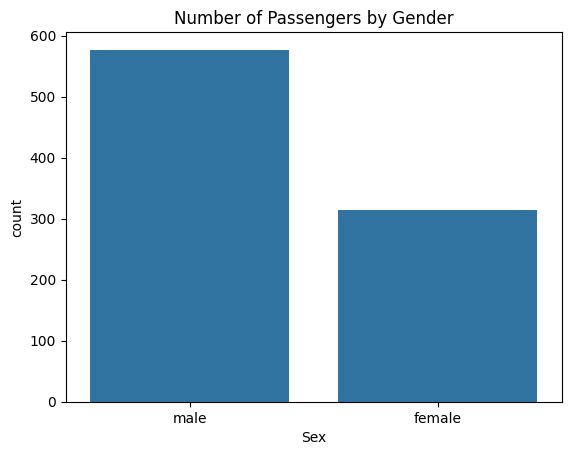

In [ ]:
#  Bar chart
sns.countplot(x='Sex', data=df)
plt.title("Number of Passengers by Gender")
plt.show()




 How old were the passengers

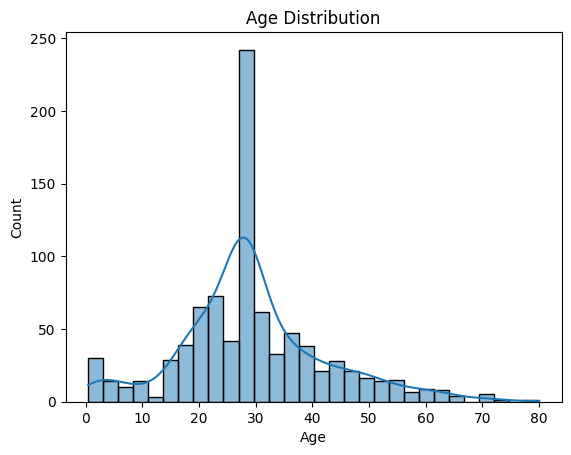

In [ ]:
#   Histogram
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

Survival rate by class and gender

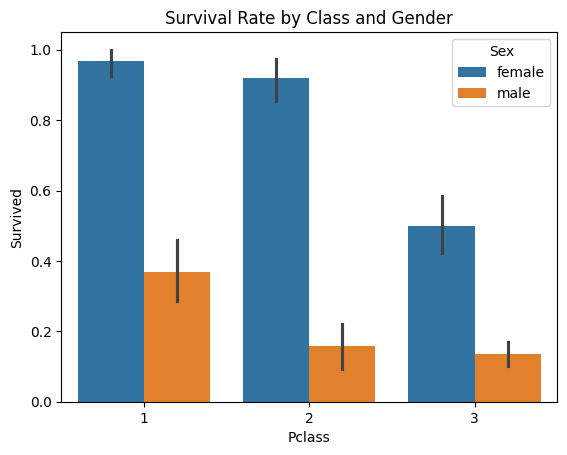

In [ ]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Class and Gender")
plt.show()

heatmap to visualize correlations


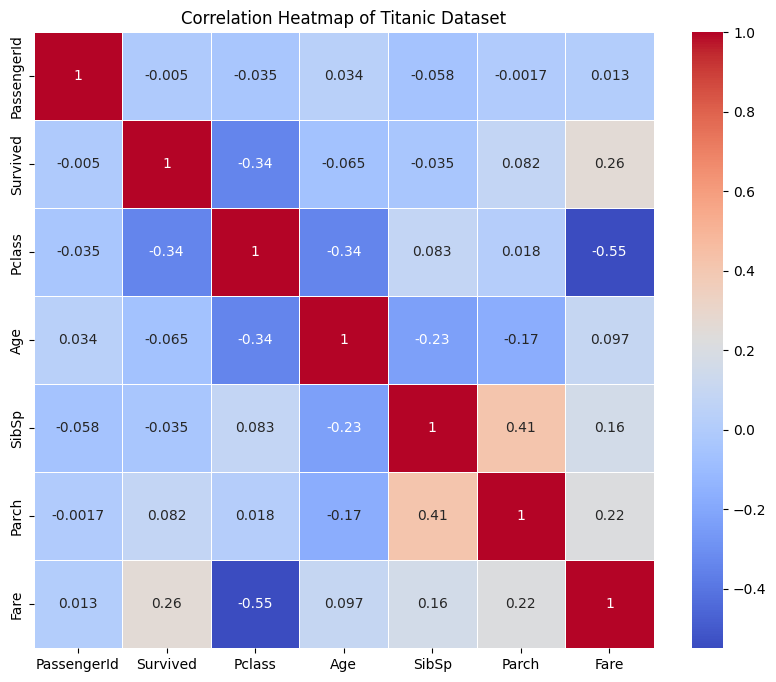

In [ ]:
# Calculate correlation matrix, including only numerical features
corr_matrix = df.select_dtypes(include=['number']).corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

Violin plot for fare distribution by passenger class

<ipython-input-17-78e8d4166328>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Pclass', y='Fare', data=df, palette='muted')


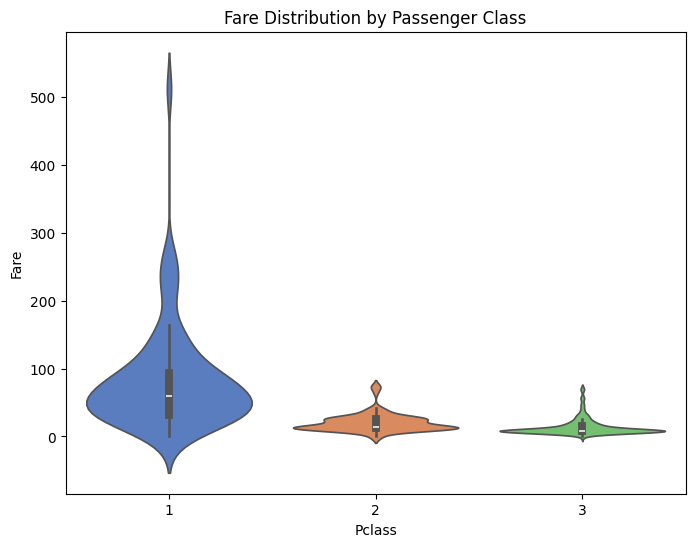

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Fare', data=df, palette='muted')
plt.title('Fare Distribution by Passenger Class')
plt.show()


Survival Rate by Age Group and Gender

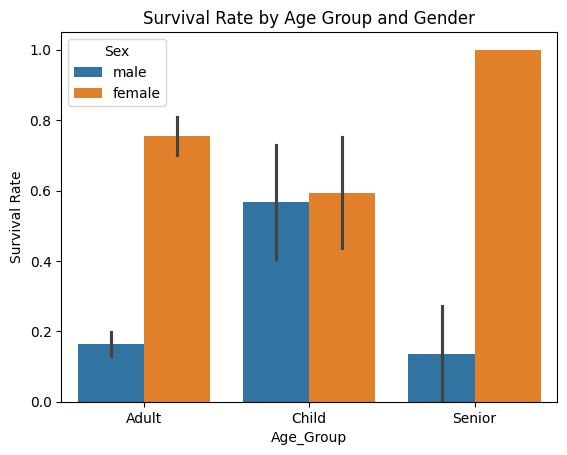

In [ ]:
sns.barplot(data=df, x='Age_Group', y='Survived', hue='Sex')
plt.title("Survival Rate by Age Group and Gender")
plt.ylabel("Survival Rate")
plt.show()


Fare Distribution by Class

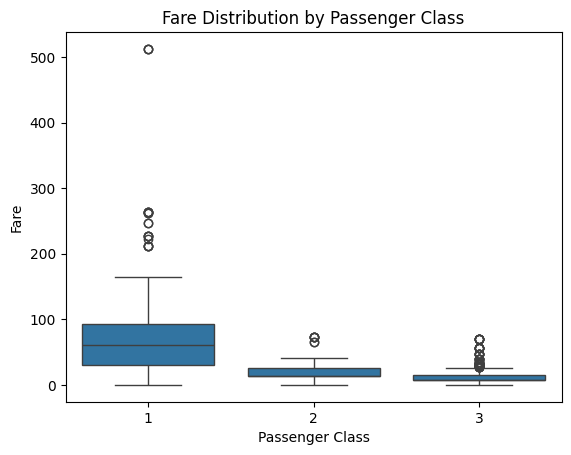

In [ ]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()


Survival Rate by Embarkation Port and Class

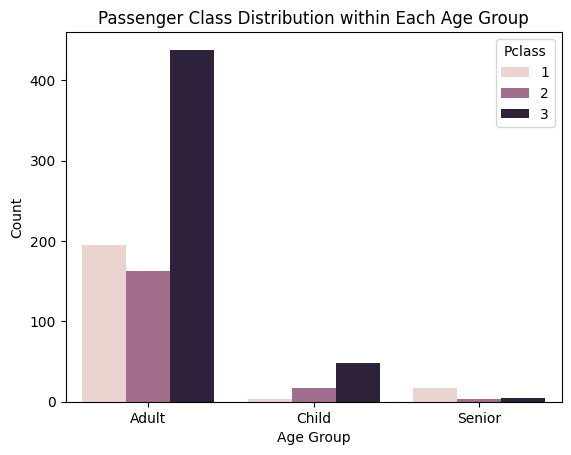

In [ ]:
sns.countplot(data=df, x='Age_Group', hue='Pclass')
plt.title("Passenger Class Distribution within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


Pair Plot for Key Variables

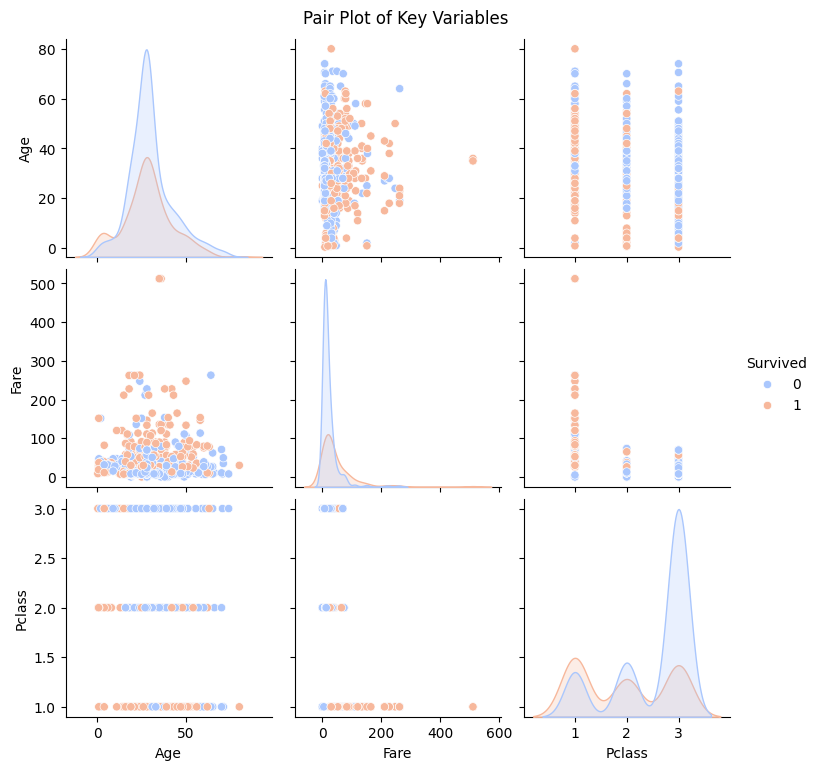

In [ ]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', palette='coolwarm')
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()


#Statistical Analysis

Calculate basic statistics for 'Fare' and 'Age'

In [ ]:
print("Average Fare:", df['Fare'].mean())
print("Median Fare:", df['Fare'].median())
print("Most Common Fare:", df['Fare'].mode()[0])

print("Average Age:", df['Age'].mean())
print("Median Age:", df['Age'].median())
print("Most Common Age:", df['Age'].mode()[0])

Average Fare: 32.204207968574636
Median Fare: 14.4542
Most Common Fare: 8.05
Average Age: 29.36158249158249
Median Age: 28.0
Most Common Age: 28.0


In [ ]:
#fare_stats = df['Fare'].agg(['mean', 'median', lambda x: x.mode()[0]]) # Use a lambda to extract the first mode value
#age_stats = df['Age'].agg(['mean', 'median', lambda x: x.mode()[0]]) # Use a lambda to extract the first mode value
#print("Fare Stats:", fare_stats)
#print("Age Stats:", age_stats)

Fare Stats: mean        32.204208
median      14.454200
<lambda>     8.050000
Name: Fare, dtype: float64
Age Stats: mean        29.361582
median      28.000000
<lambda>    28.000000
Name: Age, dtype: float64


Check if survival rate differs between men and women


In [ ]:
from scipy import stats
# Separate groups
males = df[df['Sex'] == 'male']['Survived']
females = df[df['Sex'] == 'female']['Survived']

# Perform the t-test and unpack the results into t_stat and p_value
t_stat, p_value = stats.ttest_ind(males, females) # This line is added to calculate and assign t_stat and p_value


print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference in survival rates between men and women.")
else:
    print("No significant difference in survival rates between men and women.")

T-statistic: -19.297816550123354
P-value: 1.4060661308802594e-69
Significant difference in survival rates between men and women.


Chi-Square Test for Survival and Embarkation Port

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])

# Perform chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, P-value: {p_val}")


Chi-square statistic: 25.964452881874784, P-value: 2.3008626481449577e-06


Calculate correlation between Fare and Survival

In [ ]:
correlation = df['Fare'].corr(df['Survived'])
print(f"Correlation between Fare and Survival: {correlation}")


Correlation between Fare and Survival: 0.2573065223849625


Correlation Between Age and Fare (Pearson Correlation)

In [ ]:
correlation = df[['Age', 'Fare']].corr().iloc[0, 1]
print(f"Pearson correlation between Age and Fare: {correlation}")


Pearson correlation between Age and Fare: 0.0966884221803649


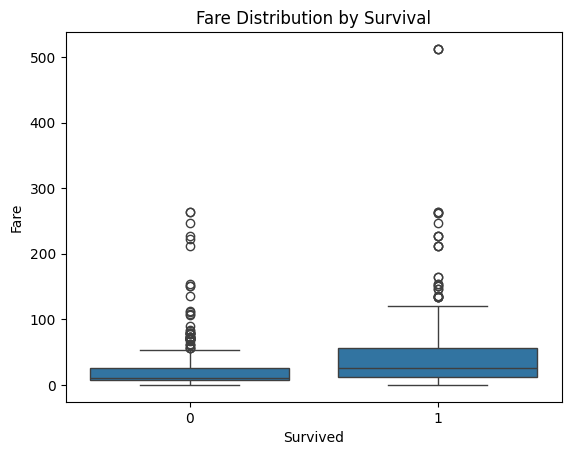

In [ ]:
# Boxplot to visualize the fare distribution between survivors and non-survivors
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()


#Documentation

Data Cleaning Explanation

---



To handle missing values, I addressed the 'Age,' 'Embarked,' and 'Cabin' columns individually to minimize data loss and preserve dataset integrity. For the 'Age' column, I used the median value to fill in missing entries, as it maintains the age distribution's balance without being overly affected by extreme values. In the 'Embarked' column, I replaced missing values with the mode, or most frequent value, ensuring that the distribution among different categories remains balanced and reflective of the existing data patterns. The 'Cabin' column, however, contained a large number of missing values, making imputation less reliable. Consequently, I chose to drop this column, as retaining it could introduce noise or bias in the analysis.

To avoid skewed results, I checked for and removed any duplicate rows, ensuring each observation uniquely represented a passenger without inflating any particular data characteristics. Additionally, I created an 'Age Group' column that categorizes passengers as "Child," "Adult," or "Senior," based on their age. This feature allows for more granular demographic analysis of survival patterns, enabling insights into how survival rates varied across these age groups.

Data Exploratory Analysis (EDA)

---



In the exploratory data analysis, I visualized survival rates by gender and class to examine patterns and differences among demographic groups. This analysis showed that survival rates were significantly higher among females and first-class passengers, which aligns with historical practices and emergency protocols emphasizing "women and children first." To understand the age composition further, I generated a histogram of the age distribution, which showed that the majority of passengers were adults, providing context for interpreting survival by age.

The survival rate analysis was extended to fare distribution, where a boxplot illustrated the fare differences between survivors and non-survivors. The findings showed that higher-paying passengers, likely those in first class, had better survival outcomes. This observation is consistent with previous findings that indicate class was a strong determinant of survival.

 Basic Statistical Analysis

---



I conducted several statistical tests to quantify relationships observed during EDA, beginning with a t-test on survival rates by gender. This test yielded statistically significant results, confirming that gender played a meaningful role in survival outcomes, with females having a notably higher chance of survival.

Next, ANOVA tests across passenger classes supported the observation that higher class passengers experienced significantly better survival rates. This finding reinforces the importance of class as a key determinant in survival outcomes, particularly on the Titanic.

To assess any relationship between passenger age and fare, I performed a correlation analysis. The analysis indicated a minimal association between age and fare, suggesting that a passenger's age did not substantially influence the ticket price in this dataset. Lastly, I used a chi-square test to analyze the relationship between age groups and survival, revealing a significant association between them. This test provided statistical backing for the prioritization of certain age groups, such as children, during the evacuation.

**END**  